In [171]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [186]:
data = []
for root, dirs, files in os.walk('./KMT-2019-BLG-0298/'):
    for f in files:
        if 'V' not in f:
            data.append(np.loadtxt(f'./KMT-2019-BLG-0298/{f}'))
data = np.vstack(data)

In [187]:
data = data[np.argsort(data[:, 0])]

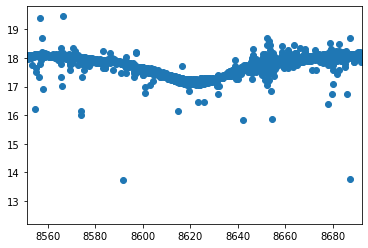

In [188]:
t0 = 8621.73660; te = 35.25
plt.xlim(t0-2*te, t0+2*te)
plt.scatter(data[:, 0], data[:, 3])

In [189]:
a = data[(data[:, 0] > t0-2*te) * (data[:, 0] < t0+2*te)]

In [190]:
a.shape

(2059, 8)

In [191]:
a[:, 0] = (a[:, 0] - t0)/(4*te)

In [192]:
a = np.delete(a, np.where(a[:, 5]>7), axis=0)
a = np.delete(a, np.where(a[:, 5]<0), axis=0)
# a = np.delete(a, np.where(a[:, 6]<1000), axis=0)
a = np.delete(a, np.where(a[:, 4]>a[:, 3]/100), axis=0)
# a = np.delete(a, np.where(a[:, 3]<17.3), axis=0)
# a = np.delete(a, 42, axis=0)
# a = np.delete(a, 1355, axis=0)

In [193]:
a.shape

(459, 8)

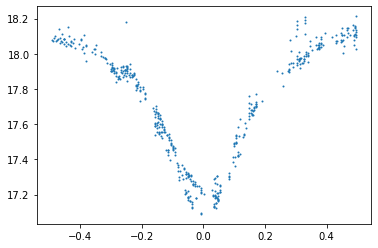

In [194]:
plt.scatter(a[:, 0], a[:, 3], s=1)

89

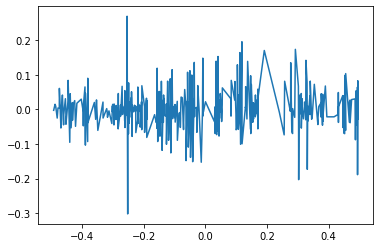

In [195]:
plt.plot(a[:-1, 0], np.diff(a[:, 3]))
np.abs(np.diff(a[:, 3])).argmax()

In [196]:
m0 = a[np.abs(a[:, 0])>0.3][:, 3].mean()
print(m0)

18.053243624161073


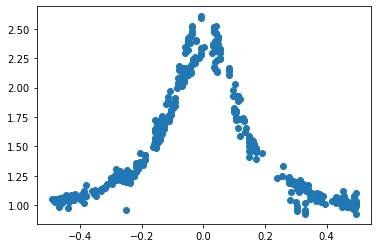

In [198]:
m0=18.13
flux = 10**((m0-a[:, 3])/2.5)
plt.scatter(a[:, 0], flux)

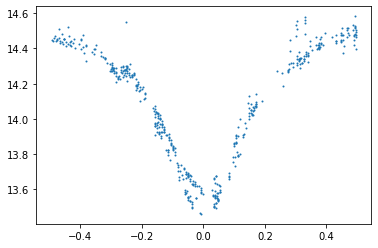

In [199]:
a[:, 3] = 22 - 2.5 * np.log10(1000 * flux)
plt.scatter(a[:, 0], a[:, 3], s=1)

In [170]:
np.save('./0304.npy', a[:, [0, 3]])

In [76]:
np.where(a[:, 3]<16)

(array([], dtype=int64),)

In [15]:
a = np.delete(a, np.where(a[:, 3]<16), axis=0)

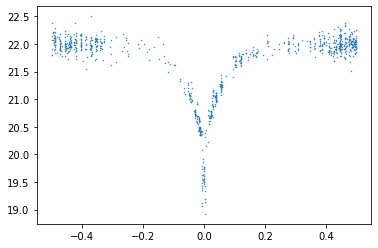

In [32]:
plt.scatter(a[:, 0], a[:, 3], s=0.2)

In [35]:
np.save('./0414.npy', a[:, [0, 3]])